In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
from sympy.utilities.lambdify import lambdify

In [2]:
def draw_graph(func):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x_grid, y_grid = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, func.f(x_grid, y_grid), alpha=0.25)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [3]:
class UserInputFunction:
    def __init__(self, user_input, start = [-10, 5]):
        self.user_input = user_input
        self.start = start
        self.result = [0, 0, 0]
        self.moment_result = [0, 0, 0]
        self.glob_min = [0, 0, 0]
        self.gradient = []

    def f(self, _x, _y):
        x, y = sp.symbols('x y', real=True)
        locals = {'x': x, 'y': y}
        self.expr = sp.sympify(self.user_input, locals=locals)
        fun = lambdify([x, y], self.expr, 'numpy')

        return fun(_x, _y)
    
    def dx(self, _x, _y):
        x, y = sp.symbols('x y', real=True)
        p = sp.diff(self.expr, x)
        p = p.evalf(subs={y: _y})
        p = p.evalf(subs={x: _x})
        

        return p


    def dy(self, _x, _y):
        x, y = sp.symbols('x y', real=True)
        p = sp.diff(self.expr, y)
        p = p.evalf(subs={x: _x})
        p = p.evalf(subs={y: _y})

        return p

class EckleyFunction:
    def __init__(self, start = [-5, 3]):
        self.start = start
        self.result = [0, 0, 0]
        self.moment_result = [0, 0, 0]
        self.glob_min = [0, 0, 0]
        self.gradient = []
    
        
    def f(self, x, y):
        return (- 20 * np.exp(- 0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) -
                np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20)

    def dx(self, x, y):
        return (2.8284 * x * np.exp(-0.1414 * np.sqrt(x ** 2 + y ** 2))) / (np.sqrt(x ** 2 + y ** 2)) + np.pi * np.exp(
            0.5 * np.cos(2 * np.pi * x) + 0.5 * np.cos(2 * np.pi * y)) * np.sin(2 * np.pi * x)

    def dy(self, x, y):
        return (2.8284 * y * np.exp(-0.1414 * np.sqrt(x ** 2 + y ** 2))) / (
            np.sqrt(x ** 2 + y ** 2)) + np.pi * np.exp(
            0.5 * np.cos(2 * np.pi * x) + 0.5 * np.cos(2 * np.pi * y)) * np.sin(2 * np.pi * y)


class BoothFunction:
    def __init__(self, start = [-10, 5]):
        self.start = start
        self.result = [0, 0, 0]
        self.moment_result = [0, 0, 0]
        self.glob_min = [1, 3, 0]
        self.gradient = []

    def f(self, x, y):
        return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

    def dx(self, x, y):
        return 10 * x + 8 * y - 34

    def dy(self, x, y):
        return 8 * x + 10 * y - 38
    


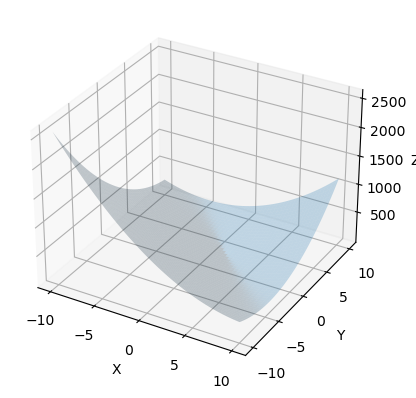

In [4]:
b = BoothFunction()
draw_graph(b)



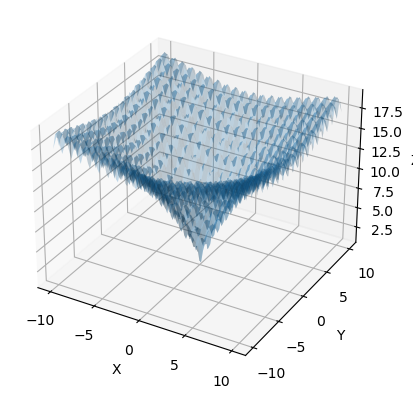

[-5, 3]


In [5]:
e = EckleyFunction()
draw_graph(e)
print(e.start)

In [6]:
def classical_gd(fun, a = 0.1, crit=0.001, counter = 100):
    x_start = fun.start[0]
    y_start = fun.start[1]
    arr = []
    arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
    while (np.abs(fun.dx(x_start, y_start))+np.abs(fun.dy(x_start,y_start)) > crit) and (counter > 0):
        x_new = x_start - a * fun.dx(x_start, y_start)
        y_new = y_start - a * fun.dy(x_start, y_start)
        x_start = x_new
        y_start = y_new
        arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
        counter -= 1
        print(counter)
        
    fun.gradient = arr
    result = fun.result = fun.gradient[-1]
    
    return result
    
        
        
        
    

In [7]:
result = classical_gd(b)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
[9.99935694e-01 3.00001169e+00 1.53449309e-08]


In [8]:
def draw_classical_gd(fun):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x_grid, y_grid = np.meshgrid(x,y)
    z_grid = fun.f(x_grid, y_grid)
    
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.25) 
    grad_range = range(len(fun.gradient))
    x = [fun.gradient[i][0] for i in grad_range]
    y = [fun.gradient[i][1] for i in grad_range]
    z = [fun.gradient[i][2] for i in grad_range]
    ax.plot(x, y, z, color='black',linewidth=1)
    ax.scatter3D(x[0], y[0], z[0], color='red')
    ax.scatter3D(x[-1], y[-1], z[-1], color = 'green')
    

[9.99935694e-01 3.00001169e+00 1.53449309e-08]
[array([-10,   5, 449]), array([ -0.6 ,  11.8 , 287.36]), array([ -6.04  ,   4.28  , 183.9104]), array([-2.40000000e-02,  8.63200000e+00,  1.17702656e+02]), array([-3.5056    ,  3.8192    , 75.32969984]), array([ 0.34464  ,  6.60448  , 48.2110079]), array([-1.883584  ,  3.524288  , 30.85504505]), array([ 0.5805696 ,  5.3068672 , 19.74722883]), array([-0.84549376,  3.33554432, 12.63822645]), array([0.73156454, 4.47639501, 8.08846493]), array([-0.18111601,  3.21474836,  5.17661756]), array([0.82820131, 3.94489281, 3.31303524]), array([0.24408576, 3.13743895, 2.12034255]), array([0.89004884, 3.6047314 , 1.35701923]), array([0.51621488, 3.08796093, 0.86849231]), array([0.92963126, 3.38702809, 0.55583508]), array([0.69037753, 3.056295  , 0.35573445]), array([0.954964  , 3.24769798, 0.22767005]), array([0.80184162, 3.0360288 , 0.14570883]), array([0.97117696, 3.15852671, 0.09325365]), array([0.87317863, 3.02305843, 0.05968234]), array([0.9815532

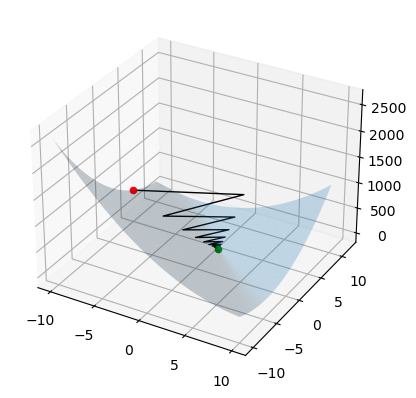

In [9]:
draw_classical_gd(b)
print(b.result)
print(b.gradient)

In [10]:
result = classical_gd(e)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[-0.30254471  0.32629583  3.26285009]


[-0.30254471  0.32629583  3.26285009]
[array([-5.       ,  3.       , 11.2319788]), array([-4.8936599 ,  2.93619594, 11.44883009]), array([-5.24210779,  3.15891406, 12.95794713]), array([-4.71847055,  2.74255222, 12.58955943]), array([-4.87813569,  2.9546853 , 11.47328883]), array([-5.27462115,  3.09373697, 12.89231286]), array([-4.73631478,  2.78859368, 12.44510365]), array([-4.9623622 ,  3.05204291, 11.33325147]), array([-5.04880351,  2.72359541, 12.34940608]), array([-4.79755239,  3.12344414, 12.16192835]), array([-5.1891336 ,  2.69058649, 12.96365892]), array([-4.78655848,  2.92738313, 11.9175403 ]), array([-5.21440724,  3.10361317, 12.57650927]), array([-4.60192149,  2.72567631, 12.7106016 ]), array([-4.60418505,  2.85071535, 12.51537028]), array([-4.66527615,  3.01048645, 12.320012  ]), array([-4.90277173,  2.91411276, 11.47779353]), array([-5.21102639,  3.22296002, 13.08152695]), array([-4.73546483,  2.78002895, 12.46931815]), array([-4.95154815,  3.03797045, 11.30413674]), arra

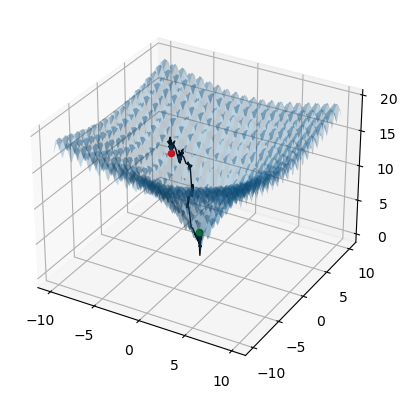

In [11]:
draw_classical_gd(e)
print(e.result)
print(e.gradient)

In [12]:
def moment_gd(fun, a=0.1, g=0.7, crit=0.001, counter=100):
    x_start = fun.start[0]
    y_start = fun.start[1]
    x_pred = x_start
    y_pred = y_start
    arr = []
    arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
    
    while (np.abs(fun.dx(x_start, y_start))+np.abs(fun.dy(x_start,y_start)) > crit) and (counter > 0):
        x_new = x_start - a * fun.dx(x_start, y_start) + g * (x_start - x_pred)
        y_new = y_start - a * fun.dy(x_start, y_start) + g * (y_start - y_pred)
        x_pred = x_start
        y_pred = y_start
        x_start = x_new
        y_start = y_new
        arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
        counter -= 1
        print(counter)
    
    fun.gradient = arr
    result = fun.gradient[-1]
    
    return result

In [13]:
result = moment_gd(b)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
[1.00007754e+00 2.99987095e+00 3.32764787e-08]


[9.99935694e-01 3.00001169e+00 1.53449309e-08]
<class 'list'>
[array([-10,   5, 449]), array([ -0.6 ,  11.8 , 287.36]), array([  0.54  ,   9.04  , 161.2388]), array([ -3.034   ,   1.436   , 144.069668]), array([-0.2506    ,  0.9044    , 50.74375748]), array([ 4.62486   ,  3.62836   , 85.89396778]), array([ 3.910134  ,  2.006884  , 24.15499134]), array([ 1.2941846 , -0.4631404 , 52.24900946]), array([1.93934774, 1.03563524, 8.94374265]), array([ 3.02310601,  3.29766476, 25.72546994]), array([1.52049898, 2.96493586, 1.21473661]), array([-0.0237736 ,  2.35069059, 12.66654223]), array([0.43845672, 3.38904719, 0.58570817]), array([1.01232347, 4.17608425, 7.03257766]), array([0.46083933, 3.54106716, 0.58346244]), array([0.18110737, 2.98681658, 3.44016117]), array([0.81473437, 3.26713869, 0.13249923]), array([1.22982794, 3.34443799, 1.49058385]), array([1.01501511, 2.87024715, 0.06972025]), array([0.9534333 , 2.65605433, 0.73046675]), array([1.23204927, 2.88731838, 0.12353856]), array([1.2851

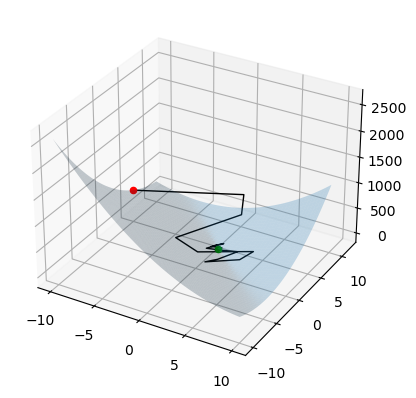

In [14]:
draw_classical_gd(b)
print(b.result)
print(type(b.gradient))
print(b.gradient)

In [15]:
result = moment_gd(e)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[ 0.83899727 -0.69772156  4.46878252]


[-0.30254471  0.32629583  3.26285009]
[array([-5.       ,  3.       , 11.2319788]), array([-4.8936599 ,  2.93619594, 11.44883009]), array([-5.16766972,  3.11425122, 12.33173739]), array([-4.74670134,  2.79105592, 12.4141916 ]), array([-4.6932472 ,  2.84054299, 12.41235582]), array([-4.8681058 ,  3.09876153, 11.76940984]), array([-5.37260432,  2.82767534, 13.35078497]), array([-5.4184557 ,  2.8297356 , 13.47064439]), array([-5.218278  ,  3.00259996, 12.36196187]), array([-4.41300302,  3.05405034, 12.31002527]), array([-3.569721  ,  2.90531351, 11.32474713]), array([-2.99320161,  2.87745628,  9.24078095]), array([-2.50793615,  3.26501175, 10.96635543]), array([-2.08105632,  3.22989528,  9.45466887]), array([-1.44084169,  2.55361799,  9.11542704]), array([-0.85620095,  1.95815076,  5.72672314]), array([-0.90815343,  1.530091  ,  6.23718557]), array([-0.99175471,  1.09626585,  4.0055406 ]), array([-0.93675895,  0.17831998,  3.27015012]), array([-0.89511874, -1.06801053,  3.95520958]), arra

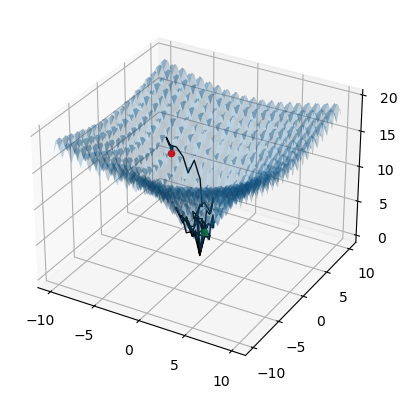

In [16]:
draw_classical_gd(e)
print(e.result)
print(e.gradient)

In [17]:
def adapt_gd(fun, a=0.1, b1 = 0.6, b2 = 0.999, e = 10e-8, crit=0.001, counter=100):
    x_start = fun.start[0]
    y_start = fun.start[1]
    arr = []
    m1 = np.array([0, 0])
    m2 = np.array([0, 0])
    arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]).astype('float64'))
    while (np.abs(fun.dx(x_start, y_start))+np.abs(fun.dy(x_start,y_start)) > crit) and (counter > 0):
        m1 = b1 * m1 + (1 - b1) * np.array([fun.dx(x_start, y_start), fun.dy(x_start, y_start)])
        m2 = b2 * m2 + (1 - b2) * np.array([fun.dx(x_start, y_start), fun.dy(x_start, y_start)]) **2 
        x_start = x_start - a * m1[0] / (np.sqrt(m2[0]) + e)
        y_start = y_start - a * m1[1] / (np.sqrt(m2[1]) + e)
        arr.append(np.array([x_start, y_start, fun.f(x_start, y_start)]))
        counter -= 1
        print(counter)
        
    fun.gradient = arr
    result = fun.gradient[-1]
    
    return result
    

In [18]:
result = adapt_gd(b)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[9.86419075e-01 3.01305985e+00 3.56087187e-04]


[9.99935694e-01 3.00001169e+00 1.53449309e-08]
[array([-10.,   5., 449.]), array([ -8.73508898,   6.26491101, 272.88441331]), array([ -7.36580497,   7.59784605, 147.91693882]), array([-6.13450953,  8.687399  , 91.6242492 ]), array([-5.157555  ,  9.34449172, 78.30784005]), array([-4.467658  ,  9.52323901, 76.90493634]), array([-4.02930147,  9.31827817, 71.86035611]), array([-3.76862685,  8.879798  , 62.25063177]), array([-3.60582174,  8.34271556, 51.93025347]), array([-3.47574379,  7.80351317, 43.53575233]), array([-3.33600231,  7.32019596, 37.46600847]), array([-3.16662499,  6.91860504, 32.96228483]), array([-2.96505764,  6.60067275, 29.21763168]), array([-2.7394498 ,  6.35342382, 25.82500035]), array([-2.50240965,  6.15734475, 22.71197838]), array([-2.26641654,  5.99281779, 19.9258604 ]), array([-2.04116925,  5.84403993, 17.49271339]), array([-1.83259543,  5.70059852, 15.38652192]), array([-1.64303022,  5.55730886, 13.55482991]), array([-1.47205329,  5.41304429, 11.94775845]), array([

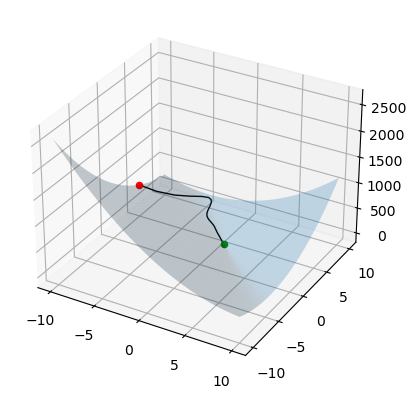

In [19]:
draw_classical_gd(b)
print(b.result)
print(b.gradient)

In [20]:
result = adapt_gd(e)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
[0.00084004 0.05698539 0.24540868]


[-0.30254471  0.32629583  3.26285009]
[array([-5.       ,  3.       , 11.2319788]), array([-3.7350927 ,  1.73509521, 10.63681884]), array([-4.29075718,  2.73632805, 12.13622542]), array([-3.2911914 ,  4.00891257, 11.66452116]), array([-1.92538031,  4.19809222, 10.4768067 ]), array([-1.5003813 ,  3.10483732,  9.53650922]), array([-1.11156411,  1.99606477,  5.82471534]), array([-0.11888129,  1.10058   ,  3.4560731 ]), array([ 1.001573  , -0.0959417 ,  2.88201385]), array([ 1.35622614, -0.24008426,  5.50096444]), array([ 1.09454531, -0.02734581,  3.11041484]), array([0.31444395, 0.2470986 , 2.98928796]), array([-0.53453321, -0.02318491,  3.16930741]), array([-0.8660319 , -0.12804298,  3.07376857]), array([-1.25301174,  0.26455047,  5.08501349]), array([-1.03266362,  0.18065278,  3.45927947]), array([-0.60620334, -0.37596731,  4.16434126]), array([-0.25016953, -0.51005163,  3.65544557]), array([ 0.20111454, -0.40933758,  3.20405742]), array([ 0.19884629, -0.06021941,  1.43363962]), array([

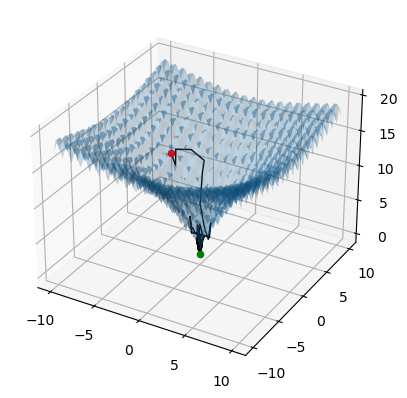

In [21]:
draw_classical_gd(e)
print(e.result)
print(e.gradient)

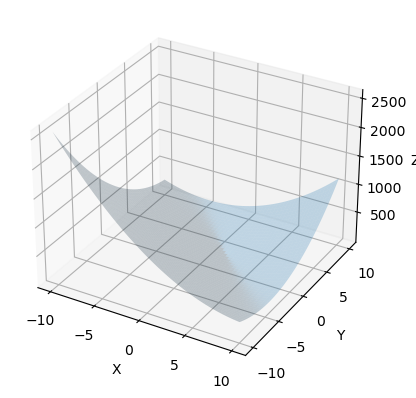

In [22]:
#u_input = input('Введите функцию : ')
# u_input = "x**2 + y**2+cos(x*y)"
u_input = '(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2'
#u_input = "- 20 * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) -\
#          exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + E + 20"
#u_input = "(x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2"
u = UserInputFunction(u_input)
draw_graph(u)

In [23]:
result = classical_gd(u)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
[0.999935693927957 3.00001169201310 1.53449308661193e-8]


[0.999935693927957 3.00001169201310 1.53449308661193e-8]
[array([-10,   5, 449]), array([-0.600000000000000, 11.8000000000000, 287.360000000000],
      dtype=object), array([-6.04000000000000, 4.28000000000000, 183.910400000000],
      dtype=object), array([-0.0239999999999982, 8.63200000000000, 117.702656000000],
      dtype=object), array([-3.50560000000000, 3.81920000000000, 75.3296998400001],
      dtype=object), array([0.344640000000001, 6.60448000000000, 48.2110078976001],
      dtype=object), array([-1.88358400000000, 3.52428800000000, 30.8550450544640],
      dtype=object), array([0.580569600000001, 5.30686720000000, 19.7472288348570],
      dtype=object), array([-0.845493760000001, 3.33554432000000, 12.6382264543085],
      dtype=object), array([0.731564544000001, 4.47639500800000, 8.08846493075743],
      dtype=object), array([-0.181116006400001, 3.21474836480000, 5.17661755568476],
      dtype=object), array([0.828201308160000, 3.94489280512000, 3.31303523563824],
      dtyp

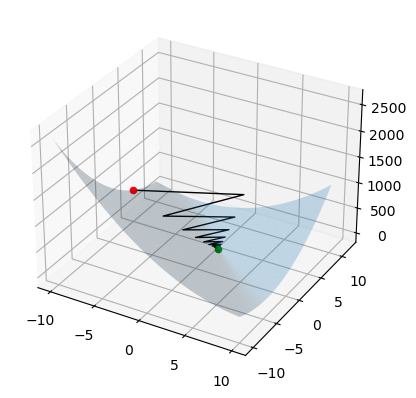

In [24]:
draw_classical_gd(u)
print(u.result)
print(u.gradient)

In [25]:
result = moment_gd(u)
print(result)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
[1.00007754395308 2.99987095295455 3.32764786958449e-8]


[0.999935693927957 3.00001169201310 1.53449308661193e-8]
<class 'list'>
[array([-10,   5, 449]), array([-0.600000000000000, 11.8000000000000, 287.360000000000],
      dtype=object), array([0.539999999999999, 9.04000000000000, 161.238800000000],
      dtype=object), array([-3.03400000000000, 1.43600000000000, 144.069668000000],
      dtype=object), array([-0.250599999999998, 0.904400000000001, 50.7437574799999],
      dtype=object), array([4.62486000000000, 3.62836000000000, 85.8939677828001], dtype=object), array([3.91013400000000, 2.00688400000000, 24.1549913367080], dtype=object), array([1.29418460000000, -0.463140400000001, 52.2490094584039],
      dtype=object), array([1.93934774000000, 1.03563524000000, 8.94374265213167], dtype=object), array([3.02310600600000, 3.29766475600000, 25.7254699374941], dtype=object), array([1.52049898140000, 2.96493585640000, 1.21473661080448], dtype=object), array([-0.0237736023399990, 2.35069058516000, 12.6665422345526],
      dtype=object), array([0

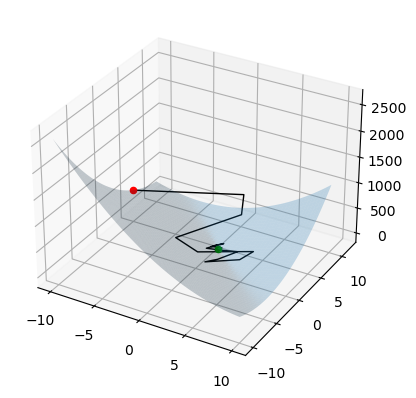

In [26]:
draw_classical_gd(u)
print(u.result)
print(type(u.gradient))
print(u.gradient)
